
Datos:
x = [1.0, 3.0, 2.0, 8.0, 7.0, 3.0, 5.0, 1.0]
y = [1.0, 8.0, 4.0, 5.0, 9.0, 3.0, 8.0, 4.0]

Matriz de distancia: 
[0.0, 7.280109889280518, 3.1622776601683795, 8.06225774829855, 10.0, 2.8284271247461903, 8.06225774829855, 3.0]
[7.280109889280518, 0.0, 4.123105625617661, 5.830951894845301, 4.123105625617661, 5.0, 2.0, 4.47213595499958]
[3.1622776601683795, 4.123105625617661, 0.0, 6.082762530298219, 7.0710678118654755, 1.4142135623730951, 5.0, 1.0]
[8.06225774829855, 5.830951894845301, 6.082762530298219, 0.0, 4.123105625617661, 5.385164807134504, 4.242640687119285, 7.0710678118654755]
[10.0, 4.123105625617661, 7.0710678118654755, 4.123105625617661, 0.0, 7.211102550927978, 2.23606797749979, 7.810249675906654]
[2.8284271247461903, 5.0, 1.4142135623730951, 5.385164807134504, 7.211102550927978, 0.0, 5.385164807134504, 2.23606797749979]
[8.06225774829855, 2.0, 5.0, 4.242640687119285, 2.23606797749979, 5.385164807134504, 0.0, 5.656854249492381]
[3.0, 4.47213595499958, 1.0, 7.071067811865

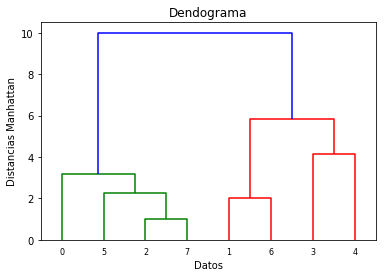

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.cluster.hierarchy as graficar
datos = pd.read_csv("ejem.csv", header=None, skiprows=1, sep=';')
distancia = []

def datos():
  x = []
  y = []
  for i in range(len(datos[0])):
    x.append(float(datos[0][i]))
  for i in range(len(datos[1])):
    y.append(float(datos[1][i]))
  print("\nDatos:")
  print("x = " + str(x))
  print("y = " + str(y))
  return x,y
    
def manhattan(x,y):
  dist = []
  for i in range(len(x)):
    dist.append([])
    for j in range(len(y)):
      dist[i].append(abs(x[j] - x[i]) + abs(y[j] -y[i]))   
  print("\nMatriz de distancia: ")
  for i in dist:
      print(i)
  distancia = dist
  return dist

def menor(x):
  menor=0
  fila=0
  columna=0
  for i in range(0,len(x)):
    for j in range(0,i):
      if (x[i][j]>menor):
        menor=x[i][j]
        fila=i
        columna=j
  print("El número menor es: "+str(menor))
  return fila,columna      

def cluster(x,y,itera):
  bandera=1
  distancia = euclidiana(x,y)
  fila , columna = menor(distancia)
  n_x=[]
  n_y=[]
  c1=(x[fila]+x[fila])/2
  c2=(y[fila]+y[fila])/2
  for i in range(len(x)):
    if((i == fila or i == columna)and bandera==1):
      n_x.append(c1)
      n_y.append(c2)
      bandera=0
    elif(i!=fila and i!=columna):
      n_x.append(x[i])
      n_y.append(y[i])
  
  if(len(distancia)!=2):
    print("\nIteracion: %d"%itera)
    itera= itera +1
    print("\nDatos actualizados")    
    print(n_x)
    print(n_y)
    cluster(n_x,n_y,itera)
    
def grafica():
  print("\nLa grafica es: ")
  dendrograma = graficar.dendrogram(graficar.linkage(datos, method = "complete"),leaf_rotation=0.,  
          leaf_font_size=8.,  
          show_contracted=True)
  plt.title("Dendograma")
  plt.xlabel("Datos")
  plt.ylabel("Distancias Manhattan")
  plt.show()
  
x, y = datos()
cluster(x,y,1)
grafica()  


In [0]:
import pandas as pd
import numpy as np
import random
import math as m

def dist_euclidiana(matriz,centroid):
  temp=0
  for i in range(len(matriz)):
    temp+=(matriz[i]-centroid[i])**2
  dist=m.sqrt(temp)
  return dist

def num_menor(matriz):
  matriz2=np.zeros((len(matriz),len(matriz[0])))
  for i in range(len(matriz[0])):
    temp=100
    for j in range(len(matriz)):
      aux=matriz[j][i]
      if(aux<temp):
        temp=aux
    for j in range(len(matriz)):
      if(temp==matriz[j][i]):
        matriz2[j][i]=1
        break
  return matriz2
def sumar(auxi,cont):
  nuevo=[]
  nume1=0
  nume2=0
  for i in range(len(auxi)):
    for j in range(len(auxi[0])):
      if(j==0):
        nume1+=auxi[i][j]
      else:
        nume2+=auxi[i][j]
  nume1=nume1/cont
  nume2=nume2/cont
  nuevo.append(nume1)
  nuevo.append(nume2)
  return nuevo
def comparar(c1,c2):
  flag=True
  for i in range(len(c1)):
    for j in range(len(c1[0])):
      if(c1[i][j]!=c2[i][j]):
        flag=False
  return flag

#**************************MAIN***********************************
datos=pd.read_csv("datos.csv",sep=',')
x = np.array(datos[["op","ex","ag"]])
y = np.array(datos['categoria'])

matriz=np.array(x)
k=int(input("Digite el valor de k: "))
D=np.zeros((k,len(matriz)))
centroides=np.zeros((k,len(matriz[0])))

for i in range(len(centroides)):
  for j in range(len(centroides[0])):
    centroides[i,j]=random.randint(1,1000)
print("Datos:\n"+str(matriz)+"\nCentroides:\n"+str(centroides))

for i in range(len(centroides)):
  for j in range(len(matriz)):
    aux=dist_euclidiana(matriz[j],centroides[i])
    D[i,j]=aux
    
print("\nD0="+str(D))
nuevo=num_menor(D)
print(nuevo)
centroides2=[]
for i in range(len(nuevo)):
  cont=0
  auxi=[]
  for j in range(len(nuevo[0])):
    if(nuevo[i,j]==1):
      cont+=1
    if(nuevo[i,j]==1):
      auxi.append(matriz[j])
  if(cont!=0):
    temp=sumar(auxi,cont)
    centroides2.append(temp)
  else:
    centroides2.append([0,0])
print("Nuevos centroides: ")
for elem in centroides2:
  print(elem)
D=np.zeros((k,len(matriz)))  
for i in range(len(centroides2)):
  for j in range(len(matriz)):
    aux=dist_euclidiana(matriz[j],centroides2[i])
    D[i,j]=aux
  
print("\nD1="+str(D))
nuevo2=num_menor(D)
print("ANTERIOR MATRIZ \n",nuevo)
print("NUEVA MATRIZ \n",nuevo2)
iterador=2
while(comparar(nuevo,nuevo2)!=True):
  centroides2=[]
  D=np.zeros((k,len(matriz)))
  for i in range(len(nuevo)):
    cont=0
    auxi=[]
    for j in range(len(nuevo[0])):
      if(nuevo[i,j]==1):
        cont+=1
      if(nuevo[i,j]==1):
        auxi.append(matriz[j])
    if(cont!=0):
      temp=sumar(auxi,cont)
      centroides2.append(temp)
    else:
      centroides2.append([0,0])
  print("Nuevos centroides: ")
  for elem in centroides2:
    print(elem)
    
  for i in range(len(centroides2)):
    for j in range(len(matriz)):
      aux=dist_euclidiana(matriz[j],centroides2[i])
      D[i,j]=aux
    
  print("\nD"+str(iterador)+"="+str(D))
  nuevo=nuevo2
  nuevo2=num_menor(D)
  print("ANTERIOR MATRIZ \n",nuevo)
  print("NUEVA MATRIZ \n",nuevo2)
  iterador+=1
print("Los centroides ya no cambian, por tanto los centroides son:\n")
for i in centroides2:
  print(i)

Digite el valor de k: 5
Datos:
[[34.297953 41.948819 29.370315]
 [44.986842 37.938947 24.279098]
 [41.733854 38.999896 34.645521]
 [40.377154 52.337538 31.082154]
 [36.664677 48.530806 31.138871]
 [33.531771 43.211667 25.786667]
 [31.851102 47.182362 19.594331]
 [31.865118 55.377559 36.258346]
 [46.393488 39.93031  16.658062]
 [39.436667 32.966288 32.291591]
 [52.750992 41.698855 17.057176]
 [41.328182 39.173333 21.070505]
 [54.407727 34.104318 18.771818]
 [47.610076 39.439545 21.438409]
 [39.435149 41.479403 21.004104]
 [48.617348 43.617955 19.263258]
 [40.073543 44.194724 33.921417]
 [43.37292  43.792263 21.067737]
 [49.792403 41.435581 16.433953]
 [30.020465 44.29969  39.117984]
 [36.909459 51.947297 34.687568]
 [50.594462 41.383154 17.896538]
 [34.186667 18.693542  9.682292]
 [31.215455 44.180909 32.87    ]
 [47.27686  41.973372 12.40186 ]
 [45.369773 35.925909 23.478258]
 [35.943438 45.519531 28.02125 ]
 [36.272348 40.065152 28.706894]
 [44.501603 46.598931 29.535038]
 [49.028308 

IndexError: ignored